In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
# Sample JSON configuration (replace this with your JSON data)
network_config = """
{
  "nodes": {
    "A": { "type": "manufacturer", "I": 30 },
    "B": { "type": "manufacturer", "I": 28 },
    "C": { "type": "manufacturer", "I": 32 },
    "D": { "type": "distributor" }
  },
  "edges": [
    { "source": "S", "target": "A", "L": 3 },
    { "source": "S", "target": "B", "L": 3 },
    { "source": "S", "target": "C", "L": 3 },
    { "source": "A", "target": "D", "L": 5 },
    { "source": "B", "target": "D", "L": 5 },
    { "source": "C", "target": "D", "L": 5 }
  ]
}
"""

In [4]:
# # Sample JSON configuration (replace this with your JSON data)
# network_config = """
# {
#   "nodes": {
#     "A": { "type": "manufacturer", "I": 0 },
#     "B": { "type": "manufacturer", "I": 0 },
#     "C": { "type": "manufacturer", "I": 0 },
#     "D": { "type": "distributor" },
#     "E": { "type": "distributor" },
#     "F": { "type": "distributor" },
#     "G": { "type": "retailer" },
#     "H": { "type": "retailer" },
#     "I": { "type": "retailer" }
#   },
#   "edges": [
#     { "source": "S", "target": "A", "L": 3 },
#     { "source": "S", "target": "B", "L": 3 },
#     { "source": "S", "target": "C", "L": 3 },
#     { "source": "A", "target": "D", "L": 5 },
#     { "source": "A", "target": "E", "L": 6 },
#     { "source": "B", "target": "D", "L": 5 },
#     { "source": "B", "target": "E", "L": 6 },
#     { "source": "C", "target": "F", "L": 7 },
#     { "source": "D", "target": "G", "L": 2 },
#     { "source": "E", "target": "G", "L": 3 },
#     { "source": "E", "target": "H", "L": 4 },
#     { "source": "F", "target": "H", "L": 5 },
#     { "source": "F", "target": "I", "L": 6 }
#   ]
# }
# """

In [9]:
# Load the JSON configuration
config = json.loads(network_config)

# Create a directed graph
graph = nx.DiGraph()

# Add nodes to the graph
for node, attributes in config['nodes'].items():
    graph.add_node(node, **attributes)

# Add edges to the graph with lead times
for edge in config['edges']:
    graph.add_edge(edge['source'], edge['target'], L=edge['L'])

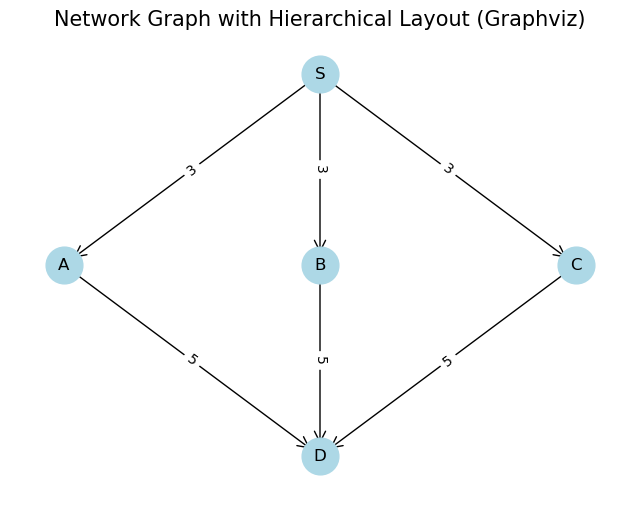

In [10]:
from networkx.drawing.nx_agraph import graphviz_layout

# Load the JSON configuration (as in the previous example)
# (You can use the same JSON data as before)

# Create a directed graph
graph = nx.DiGraph()

# Add nodes to the graph
for node, attributes in config['nodes'].items():
    graph.add_node(node, **attributes)

# Add edges to the graph with lead times
for edge in config['edges']:
    graph.add_edge(edge['source'], edge['target'], L=edge['L'])

# Print node attributes
print("Node Attributes:")
for node, attributes in graph.nodes(data=True):
    print(f"Node {node}: {attributes}")

# Define the hierarchical layout using graphviz's 'dot'
pos = graphviz_layout(graph, prog="dot")

# Define the plot
plt.figure(figsize=(8, 6))

# Draw the nodes
nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='lightblue')

# Draw the edges
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), arrowstyle='->', arrowsize=20)

# Draw the node labels
nx.draw_networkx_labels(graph, pos, font_size=12, font_family="sans-serif")

# Extract the edge labels (lead times) and draw them
edge_labels = nx.get_edge_attributes(graph, 'L')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Set plot title
plt.title("Network Graph with Hierarchical Layout (Graphviz)", fontsize=15)

# Display the plot
plt.axis('off')  # Turn off the axis
plt.show()